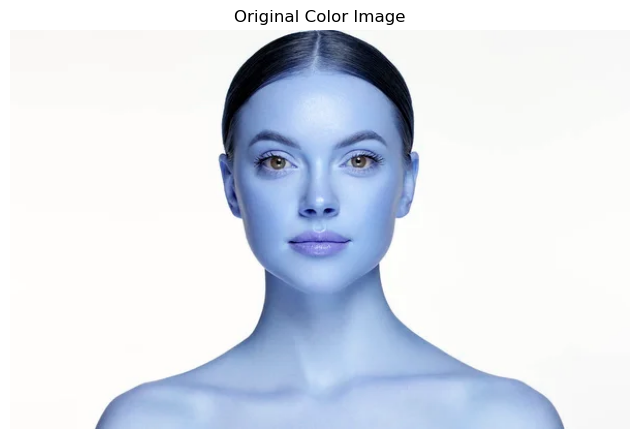

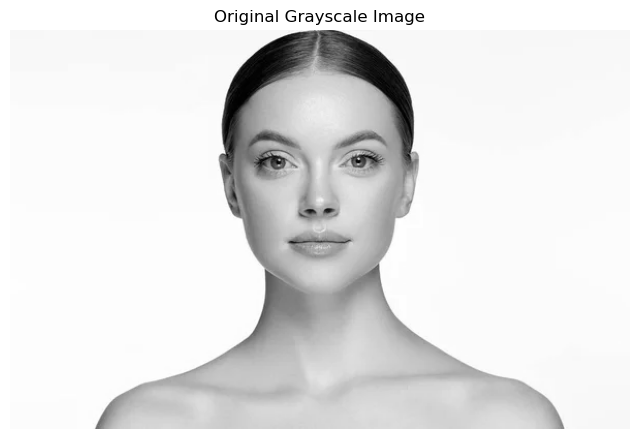

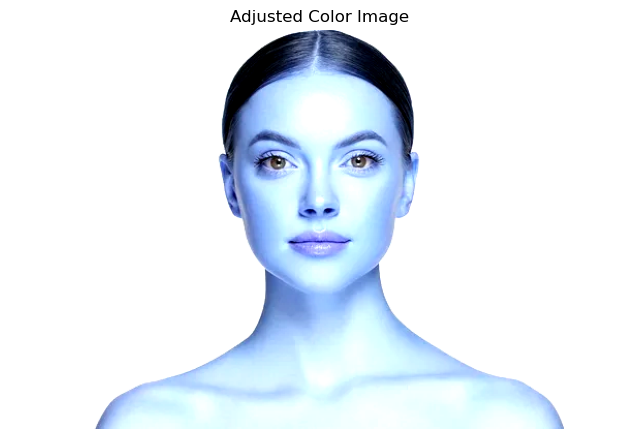

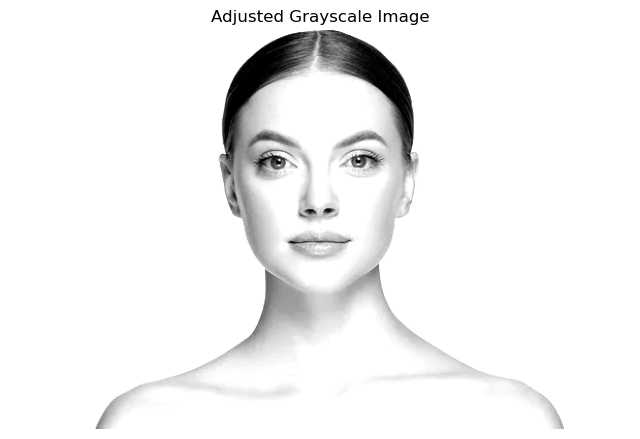

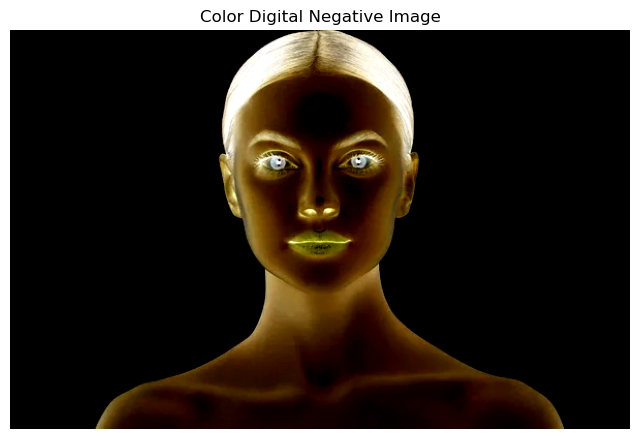

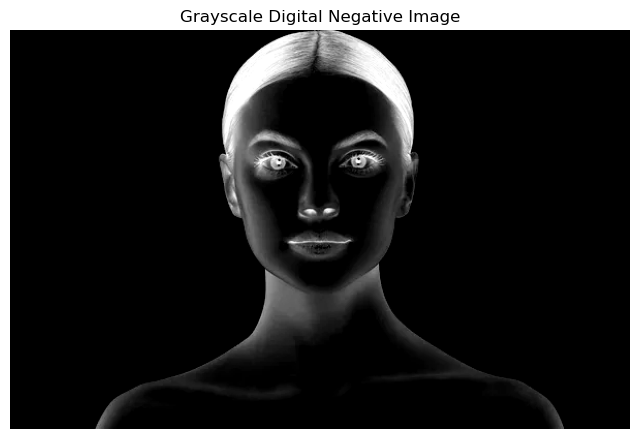

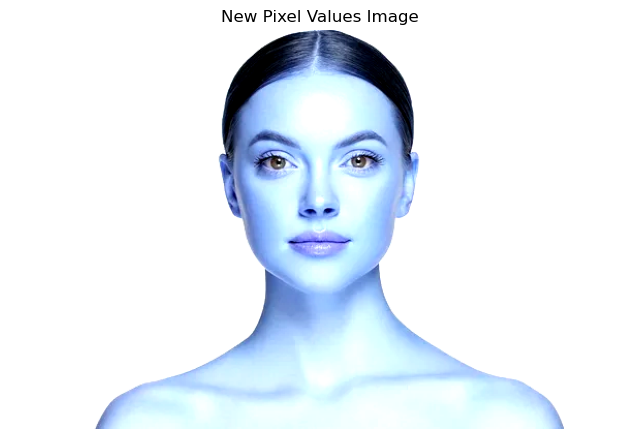

RGB values for the top-left 10x10 pixels:
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in Jupyter
def show_image(img, title="Image", cmap_type=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(img if cmap_type is None else cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = 'face.jpg'  # Update this path to your local image
color_img = cv2.imread(image_path)
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

# Create an all-black image with the same dimensions
black_img = np.zeros_like(color_img)

# Function to adjust brightness and contrast
def adjust_brightness_contrast(img, brightness=0, contrast=0):
    img = np.int16(img)
    img = img * (contrast / 127 + 1) - contrast + brightness
    return np.clip(img, 0, 255).astype(np.uint8)

# Apply brightness and contrast adjustment
brightness, contrast = 30, 50
adjusted_color_img = adjust_brightness_contrast(color_img, brightness, contrast)
adjusted_gray_img = adjust_brightness_contrast(gray_img, brightness, contrast)

# Find digital negative images
negative_color_img = 255 - adjusted_color_img
negative_gray_img = 255 - adjusted_gray_img

# Create new pixel values image by inverting the digital negative
new_pixel_values = 255 - negative_color_img

# Display images
show_image(color_img, "Original Color Image")
show_image(gray_img, "Original Grayscale Image", cmap_type='gray')
show_image(adjusted_color_img, "Adjusted Color Image")
show_image(adjusted_gray_img, "Adjusted Grayscale Image", cmap_type='gray')
show_image(negative_color_img, "Color Digital Negative Image")
show_image(negative_gray_img, "Grayscale Digital Negative Image", cmap_type='gray')
show_image(new_pixel_values, "New Pixel Values Image")

# Display RGB values for a specific section (example: top-left 10x10 pixels)
selected_pixels = new_pixel_values[:10, :10]
print("RGB values for the top-left 10x10 pixels:")
print(selected_pixels)
